In [1]:
import os
import sys
import re
import json
import numpy as np
from collections import defaultdict

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../onmt'))
if module_path not in sys.path:
    sys.path.append(module_path)

import kp_evaluate
import onmt.keyphrase.utils as utils



import seaborn as sns
import matplotlib.pyplot as plt


/Users/memray/Project/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


kp20k
inspec
krapivin
nus
semeval


/Users/memray/Project/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


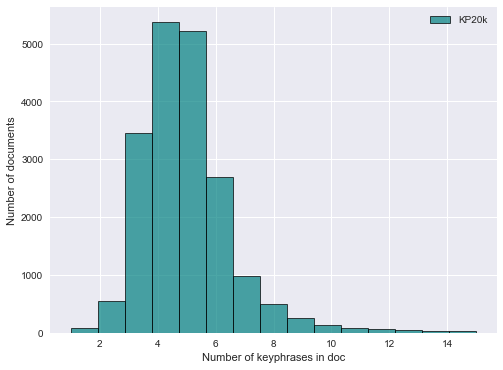

In [4]:
dataset_names = ['inspec', 'krapivin', 'nus', 'semeval', 'kp20k', 'duc', 'stackexchange']
dataset_names = ['kp20k', 'inspec', 'krapivin', 'nus', 'semeval']

json_base_dir = '/Users/memray/project/kp/OpenNMT-kpg/data/keyphrase/json/' # path to the json folder
tgt_nums = {}

fig, ax = plt.subplots(figsize=(8, 6))
    
for dataset_name in dataset_names:
    tgt_nums[dataset_name] = []
    print(dataset_name)

    input_json_path = os.path.join(json_base_dir, dataset_name, '%s_test.json' % dataset_name)
    output_json_path = os.path.join(json_base_dir, dataset_name, '%s_test_meng17token.json' % dataset_name)

    
#     with open(input_json_path, 'r') as input_json, open(output_json_path, 'w') as output_json:
    with open(input_json_path, 'r') as input_json:
        for json_line in input_json:
            json_dict = json.loads(json_line)

            if dataset_name == 'stackexchange':
                json_dict['abstract'] = json_dict['question']
                json_dict['keywords'] = json_dict['tags']            
                del json_dict['question']
                del json_dict['tags']

            title = json_dict['title']
            abstract = json_dict['abstract']
            fulltext = json_dict['fulltext'] if 'fulltext' in json_dict else ''
            keywords = json_dict['keywords']

            if isinstance(keywords, str):
                keywords = keywords.split(';')
                json_dict['keywords'] = keywords
            
            if len(keywords) < 16:
                tgt_nums[dataset_name].append(len(keywords))
    
#     sns.distplot(np.asarray(tgt_nums, dtype=int), bins=15, color="r", kde=False, rug=False);
    
    # Plot a simple histogram with binsize determined automatically
#     sns.distplot(tgt_nums, kde=False, color="b", ax=ax)

#     # Plot a kernel density estimate and rug plot
#     sns.distplot(tgt_nums, hist=False, rug=True, color="r")

#     # Plot a filled kernel density estimate
#     sns.distplot(tgt_nums, hist=False, color="g", kde_kws={"shade": True})

#     # Plot a histogram and kernel density estimate
#     sns.distplot(tgt_nums, hist=True, color="m", ax=ax)
    
# sns.distplot(tgt_nums["kp20k"] , color="skyblue", label="KP20k", bins=15, kde=False, rug=False, hist_kws=dict(alpha=0.7))
sns.distplot(tgt_nums["kp20k"] , color="teal", label="KP20k", bins=15, kde=False, rug=False, hist_kws=dict(alpha=0.7, edgecolor="k", linewidth=1))
# sns.distplot(tgt_nums["inspec"] , color="red", label="Inspec", bins=15, kde=False, rug=False, hist_kws=dict(alpha=0.7))
# sns.distplot(tgt_nums["krapivin"] , color="olive", label="Krapivin", bins=15, kde=False, rug=False, hist_kws=dict(alpha=0.7))
# sns.distplot(tgt_nums["nus"] , color="gold", label="NUS", bins=15, kde=False, rug=False, hist_kws=dict(alpha=0.7))
# sns.distplot(tgt_nums["semeval"] , color="teal", label="Semeval", bins=15, kde=False, rug=False, hist_kws=dict(alpha=0.7))

ax.set(xlabel='Number of keyphrases in doc', ylabel='Number of documents')
sns.plt.legend()
plt.show()
